# Assignment


You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Fit a Decision Tree Regressor model on your data. 
3. I want to see the training and testing accuracy of your model. So do split your data before modelling.


### Brownie Points (Extra 15 points)
- Lastly, i want to see a function where i can input my values and get a prediction of whatever you are trying to predict. Think this through !!.



Best of luck !!

![](https://media.tenor.com/mUVjXo5LhsQAAAAC/kakashi-yes.gif)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/karis/Downloads/bestsellers with categories.csv")

In [3]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [6]:
df['Name'].value_counts().head(10)

Publication Manual of the American Psychological Association, 6th Edition            10
StrengthsFinder 2.0                                                                   9
Oh, the Places You'll Go!                                                             8
The Very Hungry Caterpillar                                                           7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)             6
The Official SAT Study Guide                                                          5
To Kill a Mockingbird                                                                 5
The 5 Love Languages: The Secret to Love That Lasts                                   5
Name: Name, dtype: int64

In [7]:
df.groupby('Year')['User Rating'].mean()

Year
2009    4.584
2010    4.558
2011    4.558
2012    4.532
2013    4.554
2014    4.622
2015    4.648
2016    4.678
2017    4.660
2018    4.668
2019    4.740
Name: User Rating, dtype: float64

In [8]:
print(df.groupby('Year')['Reviews'].sum())

Year
2009    235506
2010    273981
2011    405041
2012    654546
2013    654907
2014    792997
2015    711669
2016    709800
2017    644420
2018    696521
2019    794917
Name: Reviews, dtype: int64


In [9]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


## What are the most popular genres of books on Amazon's bestseller list? Are there any trends in genre popularity over time?

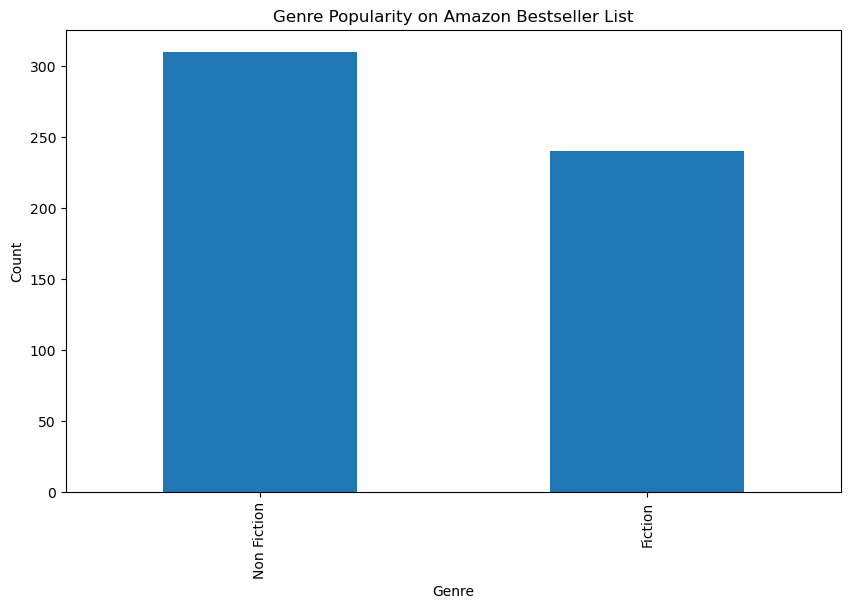

<Figure size 1200x800 with 0 Axes>

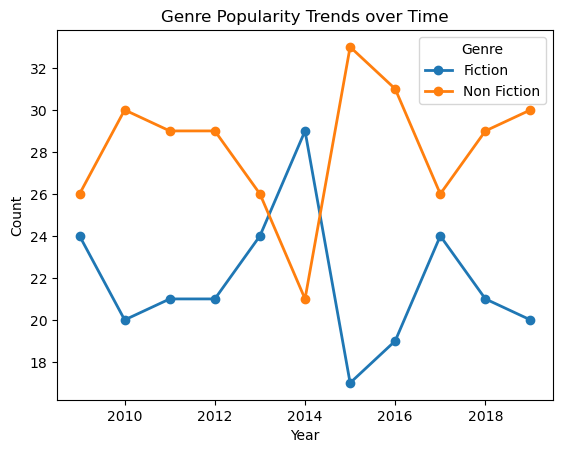

In [10]:
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Popularity on Amazon Bestseller List')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


genre_trends = df.groupby(['Year', 'Genre']).size().unstack()
plt.figure(figsize=(12, 8))
genre_trends.plot(marker='o', linewidth=2)
plt.title('Genre Popularity Trends over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Genre')
plt.show()

## Which authors have the most books on the bestseller list? Are there any trends in author popularity over time?

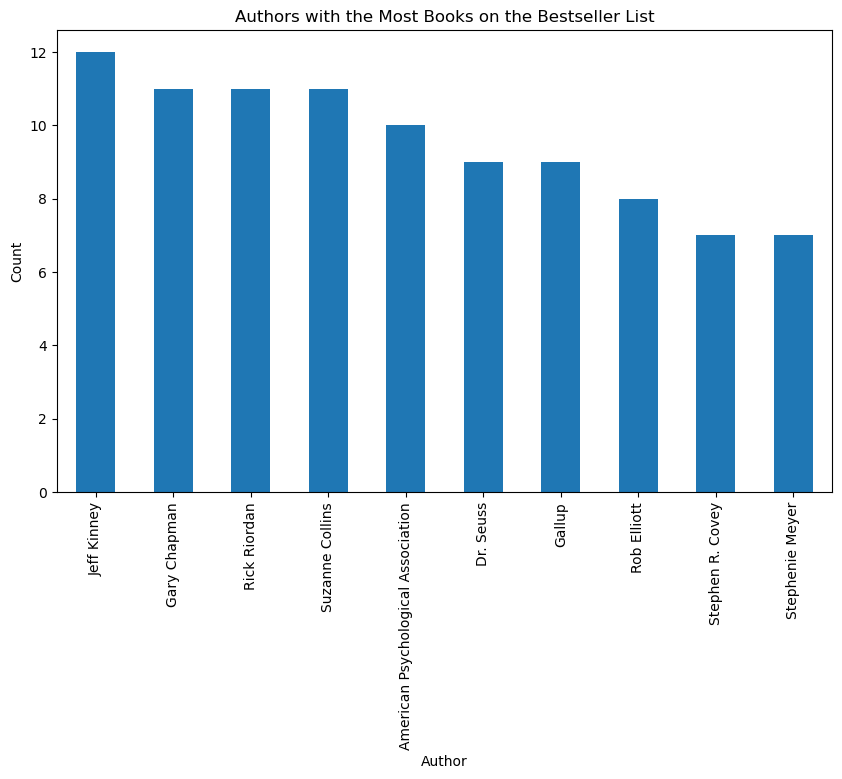

<Figure size 1200x800 with 0 Axes>

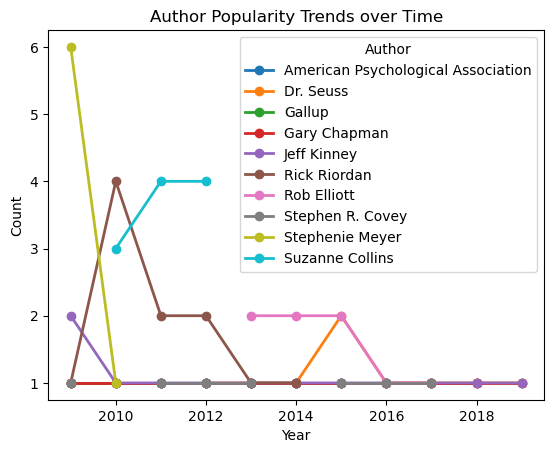

In [11]:
author_counts = df['Author'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
author_counts.plot(kind='bar')
plt.title('Authors with the Most Books on the Bestseller List')
plt.xlabel('Author')
plt.ylabel('Count')
plt.show()

top_authors = df['Author'].value_counts().nlargest(10).index.tolist()
df_top_authors = df[df['Author'].isin(top_authors)]
author_trends = df_top_authors.groupby(['Year', 'Author']).size().unstack()
plt.figure(figsize=(12, 8))
author_trends.plot(marker='o', linewidth=2)
plt.title('Author Popularity Trends over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Author')
plt.show()

## What is the average user rating for books on the bestseller list? Is there a relationship between user rating and book sales?

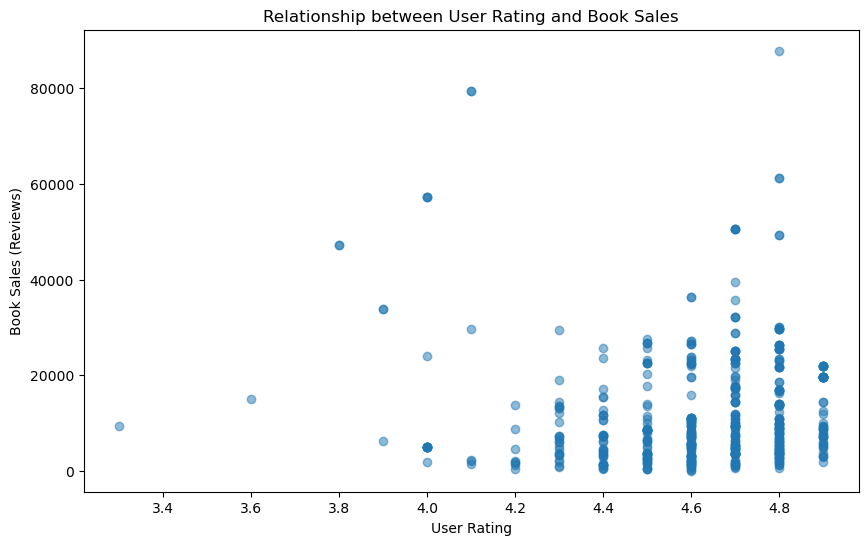

Average User Rating: 4.618363636363637
Correlation Coefficient: -0.0017290142555500398


In [12]:
average_rating = df['User Rating'].mean()
plt.figure(figsize=(10, 6))
plt.scatter(df['User Rating'], df['Reviews'], alpha=0.5)
plt.title('Relationship between User Rating and Book Sales')
plt.xlabel('User Rating')
plt.ylabel('Book Sales (Reviews)')
plt.show()

correlation = df['User Rating'].corr(df['Reviews'])
print("Average User Rating:", average_rating)
print("Correlation Coefficient:", correlation)

## How many reviews do books on the bestseller list typically receive? Is there a relationship between the number of reviews and book sales?

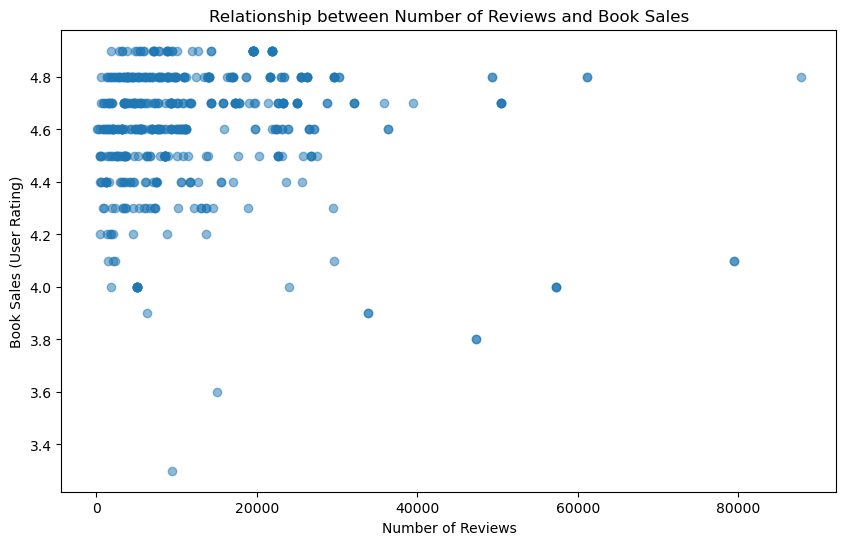

Typical Number of Reviews: 8580.0
Correlation Coefficient: -0.0017290142555500398


In [13]:
typical_reviews = df['Reviews'].median()
plt.figure(figsize=(10, 6))
plt.scatter(df['Reviews'], df['User Rating'], alpha=0.5)
plt.title('Relationship between Number of Reviews and Book Sales')
plt.xlabel('Number of Reviews')
plt.ylabel('Book Sales (User Rating)')
plt.show()

correlation = df['Reviews'].corr(df['User Rating'])
print("Typical Number of Reviews:", typical_reviews)
print("Correlation Coefficient:", correlation)

## What is the average price of books on the bestseller list? Is there a relationship between book price and sales?

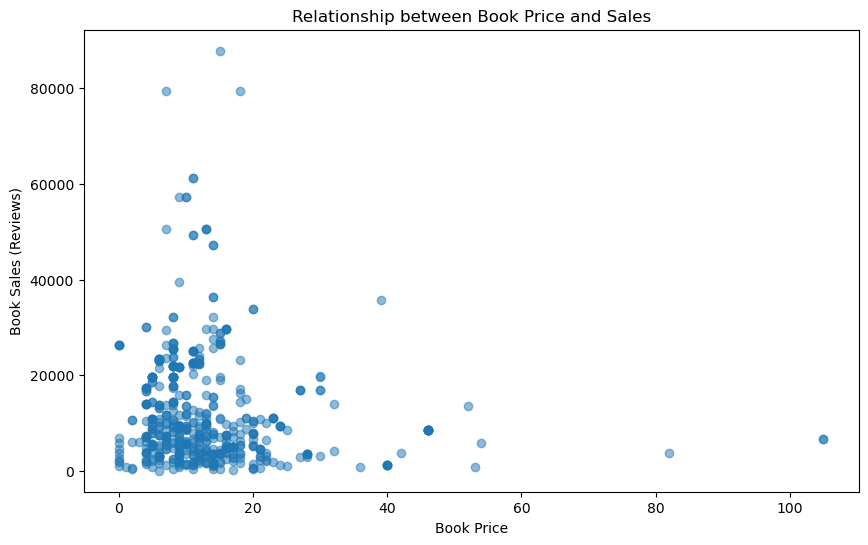

Average Price: 13.1
Correlation Coefficient: -0.10918188342780516


In [14]:
average_price = df['Price'].mean()
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Reviews'], alpha=0.5)
plt.title('Relationship between Book Price and Sales')
plt.xlabel('Book Price')
plt.ylabel('Book Sales (Reviews)')
plt.show()

correlation = df['Price'].corr(df['Reviews'])
print("Average Price:", average_price)
print("Correlation Coefficient:", correlation)

## How has the book market changed over time? Are there any notable shifts in genre popularity, author success, or other factors that may impact sales?

C:\Users\karis\AppData\Local\Temp\ipykernel_8836\2829662598.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = df_reset.groupby('Year').mean()


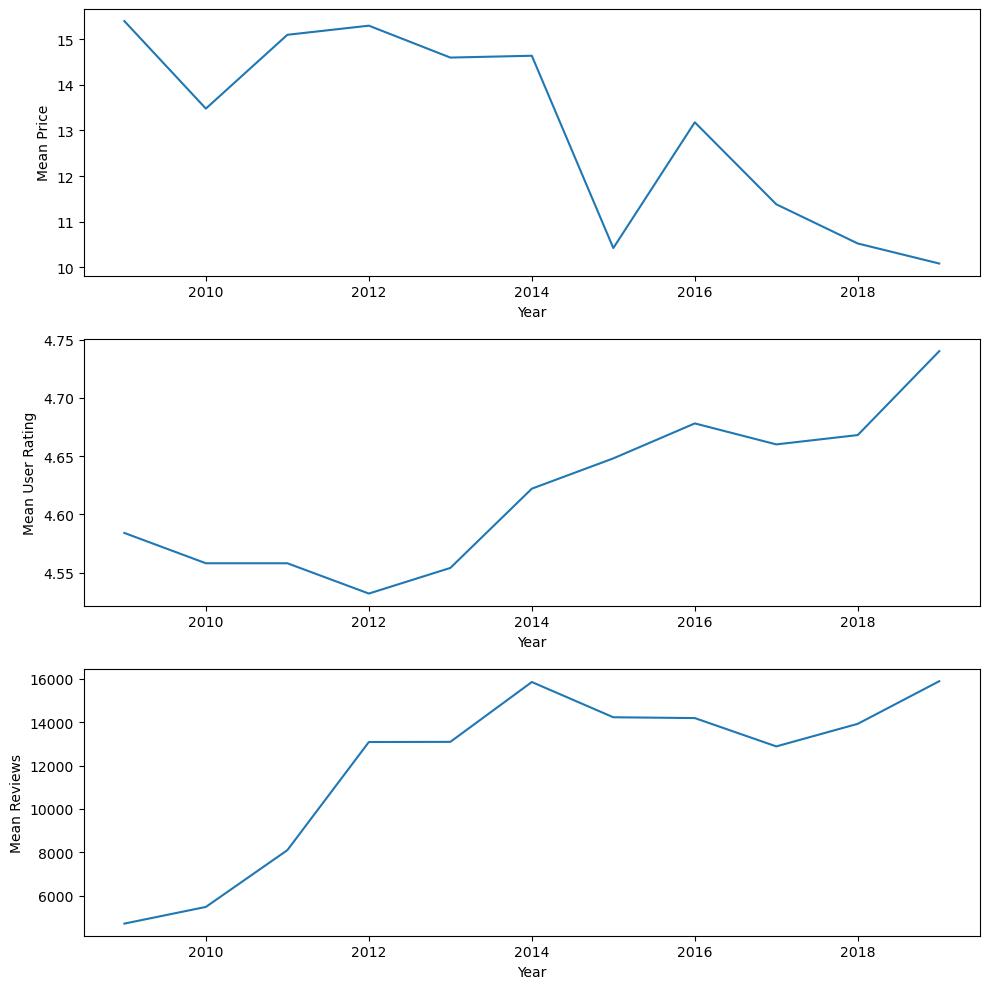

In [15]:
import matplotlib.pyplot as plt

# Reset the index of the DataFrame
df_reset = df.reset_index()

# Group data by year and calculate mean values
yearly_data = df_reset.groupby('Year').mean()

# Plot mean price, user rating, and reviews over time
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
yearly_data['Price'].plot(ax=ax[0])
ax[0].set_ylabel('Mean Price')
yearly_data['User Rating'].plot(ax=ax[1])
ax[1].set_ylabel('Mean User Rating')
yearly_data['Reviews'].plot(ax=ax[2])
ax[2].set_ylabel('Mean Reviews')
ax[2].set_xlabel('Year')

plt.tight_layout()
plt.show()


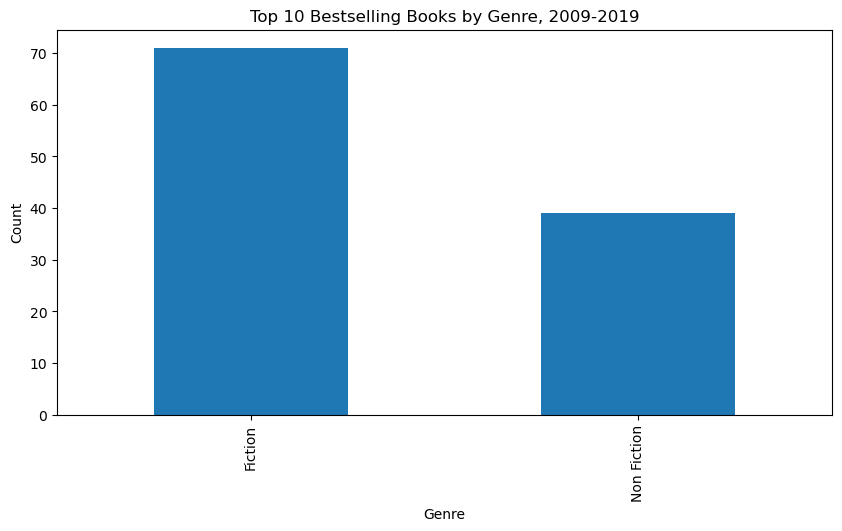

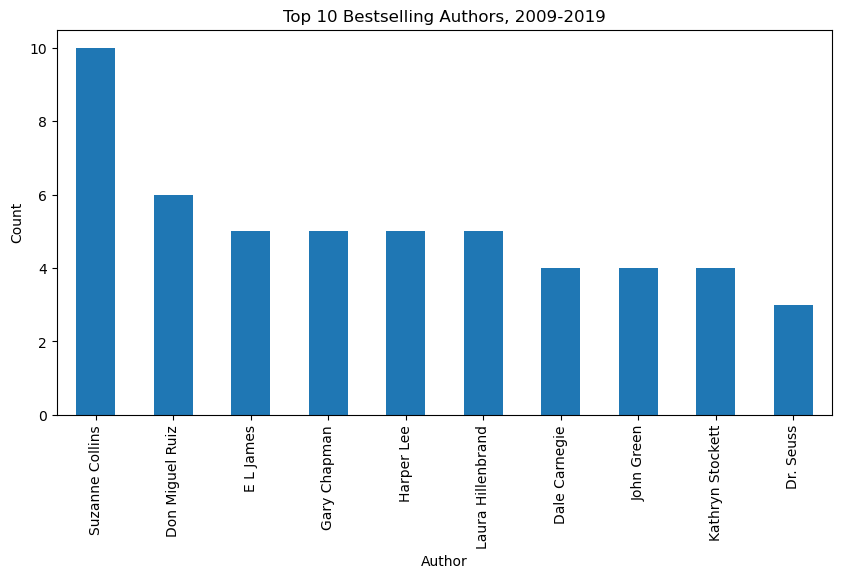

In [16]:
import matplotlib.pyplot as plt

# Get top 10 bestselling books for each year
bestsellers_by_year = df.groupby('Year').apply(lambda x: x.nlargest(10, 'Reviews')).reset_index(drop=True)

# Count number of books by genre for each year
genre_counts = bestsellers_by_year.groupby('Genre').size()

# Plot genre counts
genre_counts.plot(kind='bar', figsize=(10, 5))
plt.ylabel('Count')
plt.title('Top 10 Bestselling Books by Genre, 2009-2019')
plt.show()

# Count number of books by author for each year
author_counts = bestsellers_by_year.groupby('Author').size().nlargest(10)

# Plot author counts
author_counts.plot(kind='bar', figsize=(10, 5))
plt.ylabel('Count')
plt.title('Top 10 Bestselling Authors, 2009-2019')
plt.show()


## What is the average price of books on the bestseller list, and how has this changed over time?

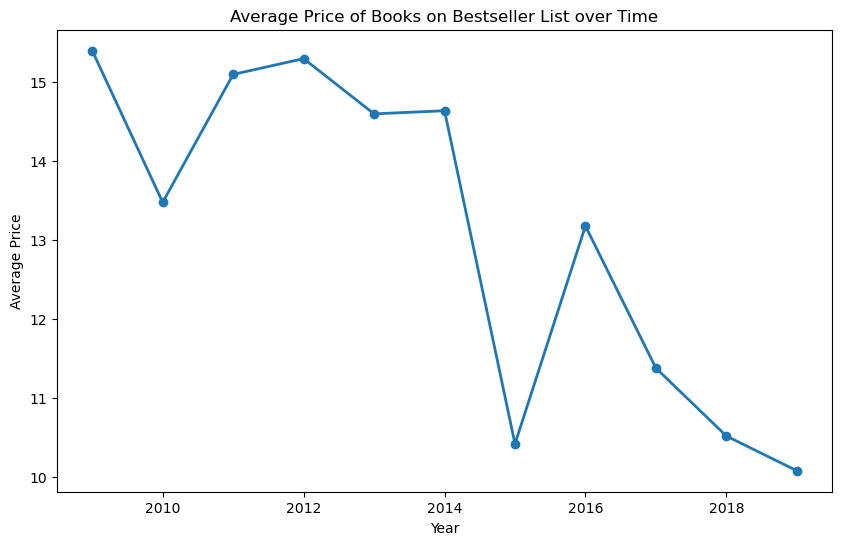

In [17]:
import matplotlib.pyplot as plt

# Calculate the average price of books on the bestseller list
average_price = df.groupby('Year')['Price'].mean()

# Plot the average price over time
plt.figure(figsize=(10, 6))
average_price.plot(marker='o', linewidth=2)
plt.title('Average Price of Books on Bestseller List over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

## Are there any patterns in terms of book prices within specific genres or for specific authors?

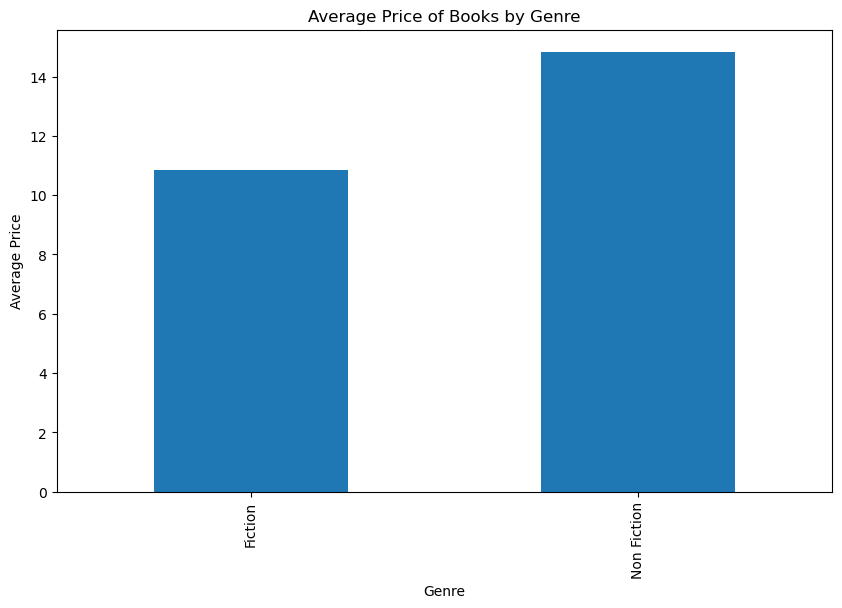

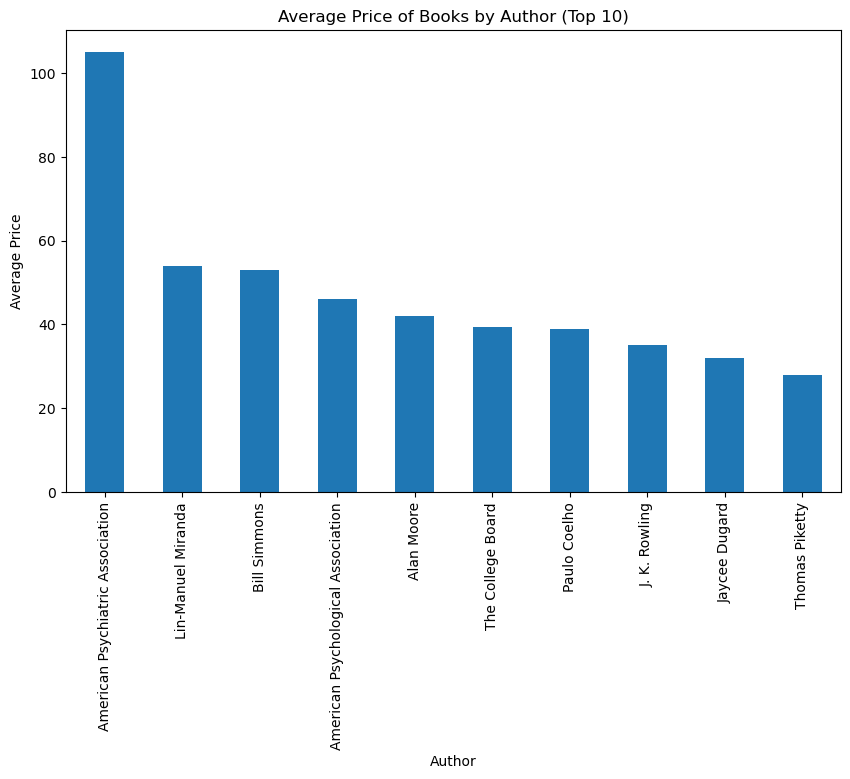

In [18]:
import matplotlib.pyplot as plt

# Average price by genre
average_price_by_genre = df.groupby('Genre')['Price'].mean()

# Plot average price by genre
plt.figure(figsize=(10, 6))
average_price_by_genre.plot(kind='bar')
plt.title('Average Price of Books by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Price')
plt.show()

# Average price by author
average_price_by_author = df.groupby('Author')['Price'].mean().nlargest(10)

# Plot average price by author
plt.figure(figsize=(10, 6))
average_price_by_author.plot(kind='bar')
plt.title('Average Price of Books by Author (Top 10)')
plt.xlabel('Author')
plt.ylabel('Average Price')
plt.show()


## What is the relationship between book price and sales? Are there any price points at which sales tend to increase or decrease significantly?

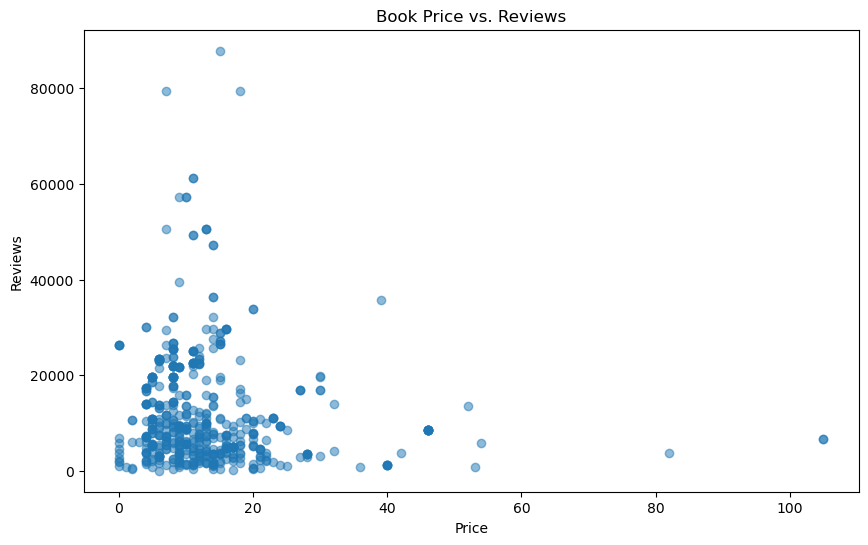

In [19]:
import matplotlib.pyplot as plt

# Scatter plot of price vs. reviews (as a proxy for sales)
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Reviews'], alpha=0.5)
plt.title('Book Price vs. Reviews')
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.show()

## Which books have consistently appeared on the bestseller list over time, and what factors contribute to their success?

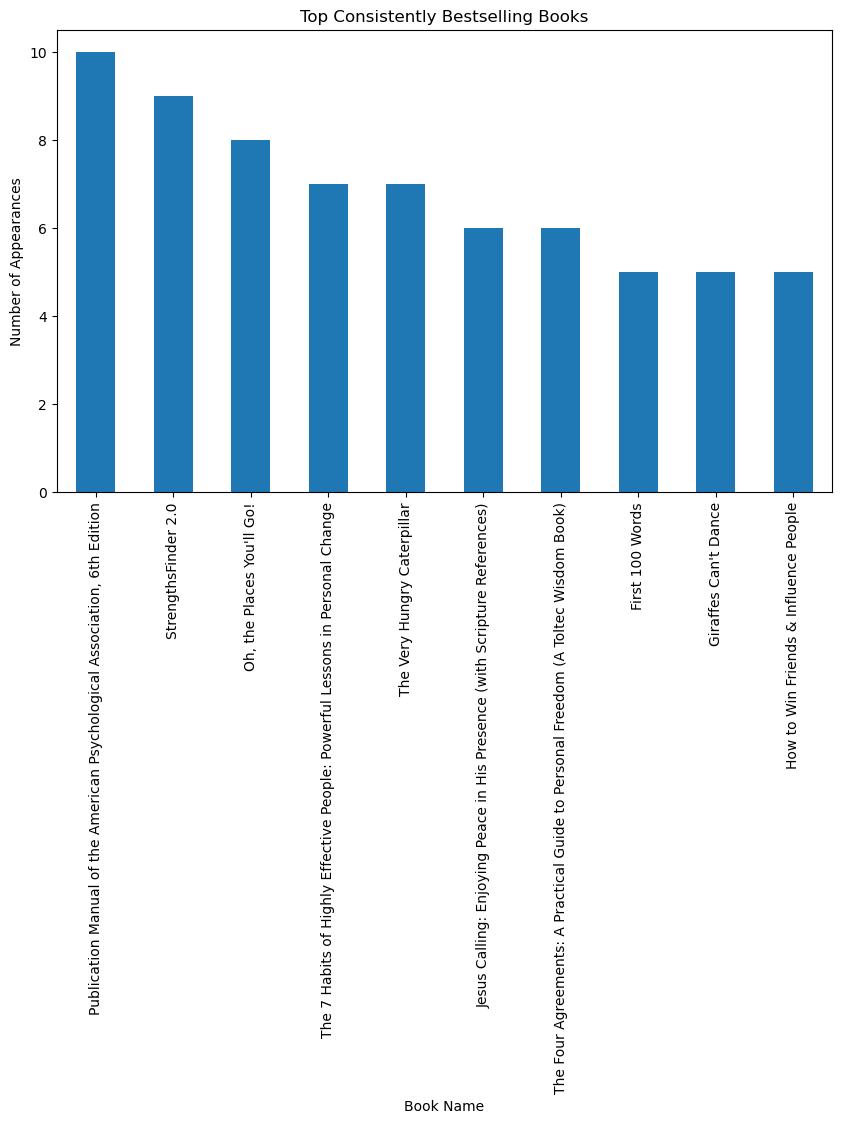

In [20]:
import matplotlib.pyplot as plt

# Group by book name and count the number of years each book appears on the bestseller list
book_appearances = df.groupby('Name')['Year'].nunique()

# Select books that have appeared in at least 5 different years
consistently_bestsellers = book_appearances[book_appearances >= 5]

# Get the top 10 consistently bestselling books
top_consistently_bestsellers = consistently_bestsellers.nlargest(10)

# Plot the number of appearances for the top consistently bestselling books
plt.figure(figsize=(10, 6))
top_consistently_bestsellers.plot(kind='bar')
plt.title('Top Consistently Bestselling Books')
plt.xlabel('Book Name')
plt.ylabel('Number of Appearances')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [22]:
new_df = df[['User Rating', 'Reviews', 'Price', 'Year']]

In [23]:
X = new_df.drop('Price', axis=1) 
y = new_df['Price']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = DecisionTreeRegressor(min_samples_split=100)
model.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_split=100)

In [38]:
model.score(X_train,y_train)

0.21561088166119813

[Text(0.5, 0.9166666666666666, 'x[1] <= 8792.0\nsquared_error = 109.073\nsamples = 440\nvalue = 13.143'),
 Text(0.3, 0.75, 'x[1] <= 8535.5\nsquared_error = 160.944\nsamples = 228\nvalue = 15.206'),
 Text(0.2, 0.5833333333333334, 'x[1] <= 1202.5\nsquared_error = 136.193\nsamples = 218\nvalue = 14.179'),
 Text(0.1, 0.4166666666666667, 'squared_error = 229.504\nsamples = 22\nvalue = 21.636'),
 Text(0.3, 0.4166666666666667, 'x[2] <= 2013.5\nsquared_error = 118.776\nsamples = 196\nvalue = 13.342'),
 Text(0.2, 0.25, 'x[1] <= 3798.5\nsquared_error = 160.78\nsamples = 109\nvalue = 14.55'),
 Text(0.1, 0.08333333333333333, 'squared_error = 35.899\nsamples = 55\nvalue = 12.745'),
 Text(0.3, 0.08333333333333333, 'squared_error = 281.275\nsamples = 54\nvalue = 16.389'),
 Text(0.4, 0.25, 'squared_error = 62.028\nsamples = 87\nvalue = 11.828'),
 Text(0.4, 0.5833333333333334, 'squared_error = 176.04\nsamples = 10\nvalue = 37.6'),
 Text(0.7, 0.75, 'x[0] <= 4.65\nsquared_error = 43.787\nsamples = 212\nv

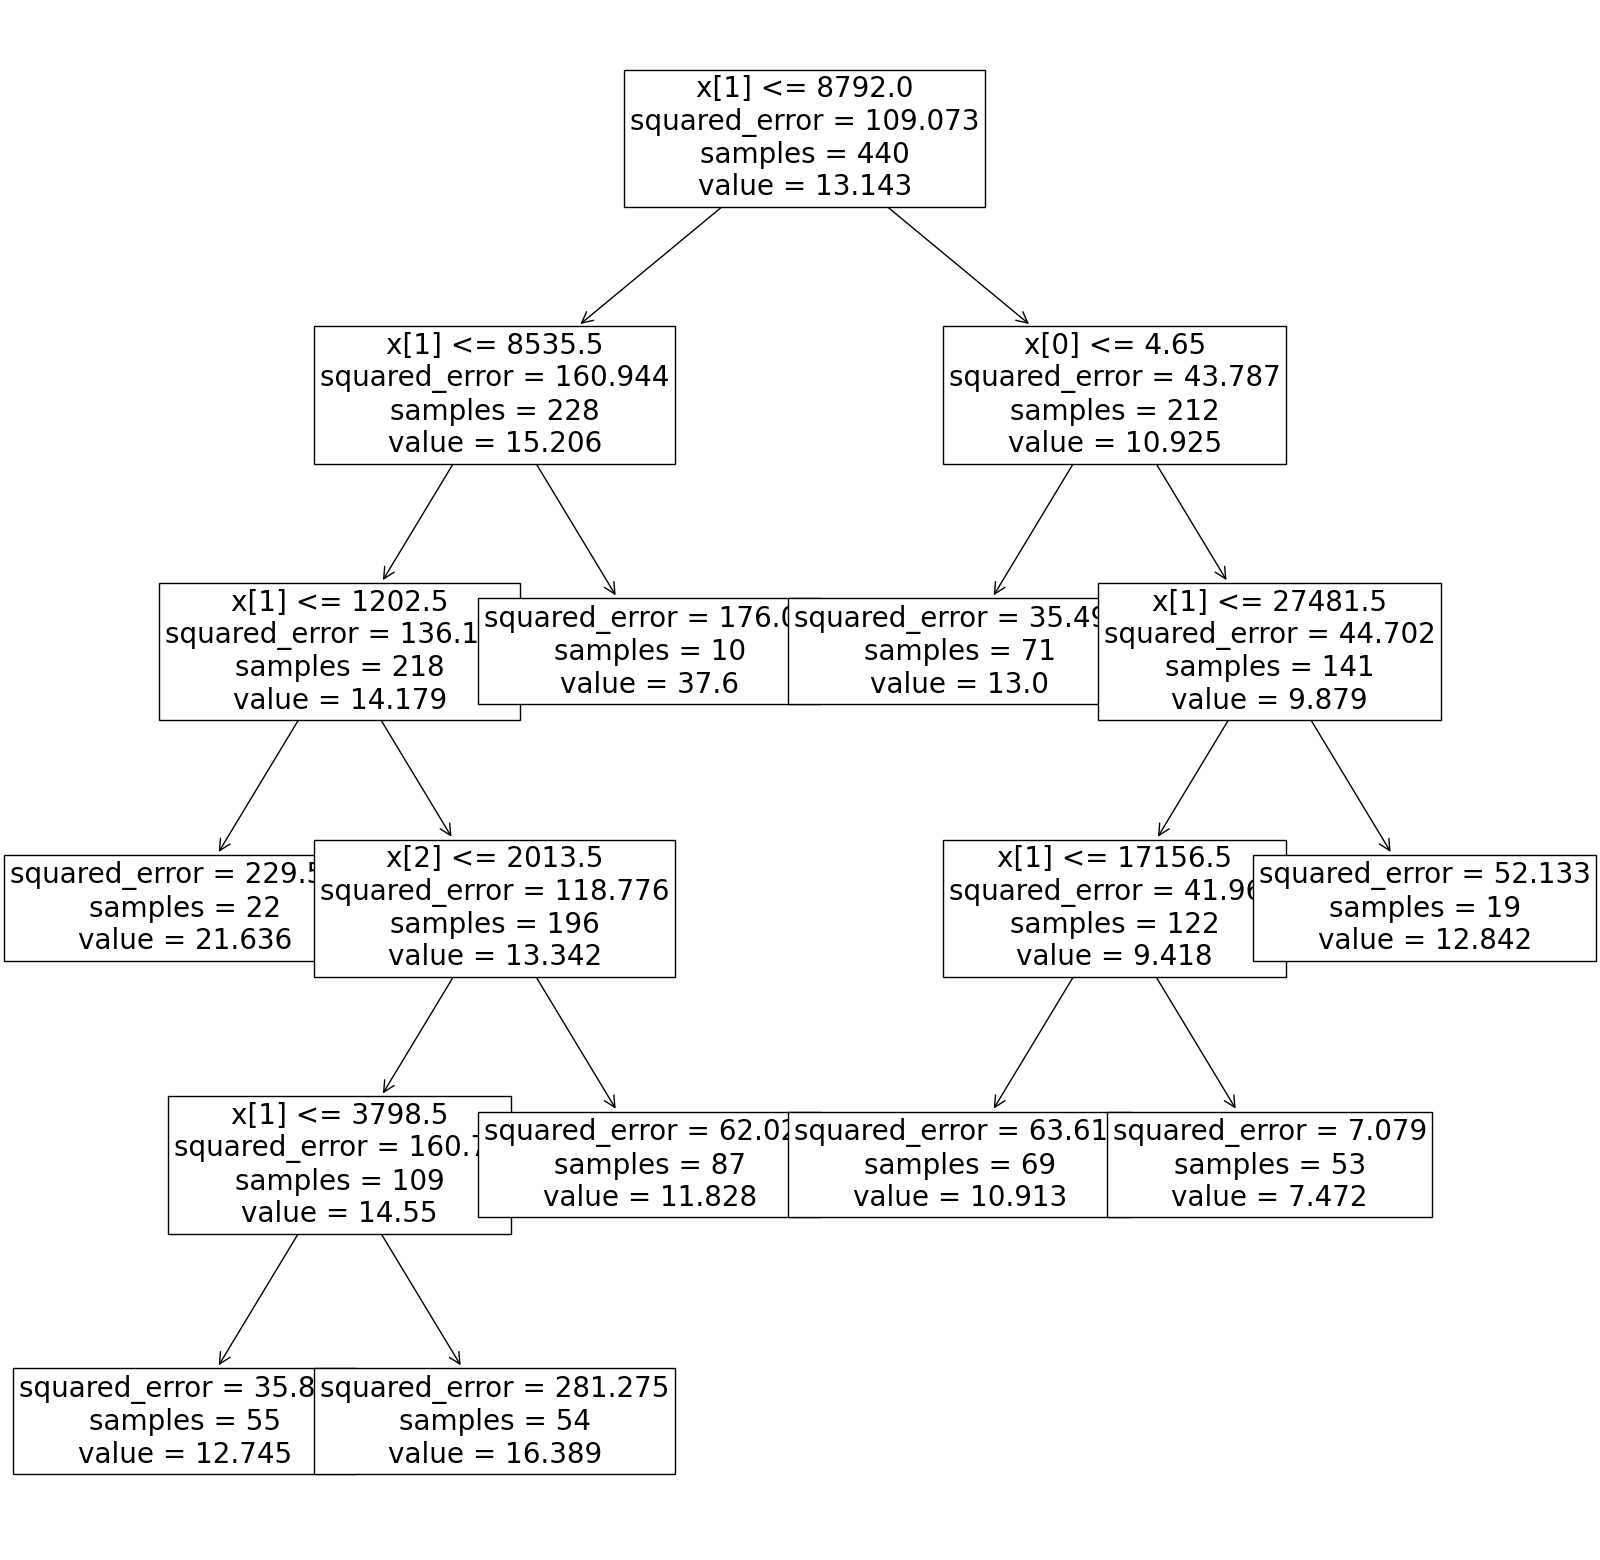

In [40]:
plt.figure(figsize=(20,20))
tree.plot_tree(model, fontsize=20)

In [26]:
y_train_pred = model.predict(X_train)

In [27]:
y_test_pred = model.predict(X_test)

In [28]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_accuracy = 1 - (train_mse / y_train.var())
test_accuracy = 1 - (test_mse / y_test.var())

In [29]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9986382904605604
Testing Accuracy: 0.09765514224349259


In [30]:
def predict_price(user_rating, reviews, year):
    input_data = pd.DataFrame({'User Rating': [user_rating],
                               'Reviews': [reviews],
                               'Year': [year]})
    predicted_price = model.predict(input_data)    
    return predicted_price

In [31]:
user_rating = 4.5
reviews = 500
year = 2022

In [32]:
prediction = predict_price(user_rating, reviews, year)
print("Predicted Price:", prediction)

Predicted Price: [14.]
